In [2]:
from RegistrationObj import RegistrationObj, RegistrationObj_noisy
from utils import colour_map, min_max_normalisation, mae, mae_permutation

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.lines as mlines
import seaborn as sns
import scipy.stats as st
import open3d as o3d
from open3d import JVisualizer
from mpl_toolkits.mplot3d import Axes3D
import copy

# Introduction

To assess the performance of the registration pipeline more stringently, we sought to compare the algorithm's performance across various datasets. The datasets we have chosen for comparison are:

1. Images of two separate zebrafish tailbuds at 18ss. We called this pair of images `Test sample`. `Test sample` exemplifies the performance of the algorithm on an actual use case as in practice, ZebReg is used to align different tailbuds of the same stage to a target image.

2. Images of two lateral halves of a single 18ss tailbud image. We called this pair of images `Lateral halves`. Since the point clouds do not overlap, any correspondence between the points in `Lateral halves` are spurious. However, given that the lateral halves of the embryo are quite symmetrical, we expect this to be a rather tricky example for the algorithm as many points may coincide in space by chance. In addition, the expression of sox2, which is the color intensity channel used in the colored ICP alignment, shows a superficially similar spatial expression distribution between the lateral halves. 

3. Images of the anterior and posterior ends of a single 18ss tailbud image. We called this pair of images `AP`. Similar to `Lateral halves`, any correspondence found between points are spurious. However, as both the gene expression distribution and the position of points differ significantly between the anterior and posterior ends of the tailbud, we expect `AP` to perform the worst amongst the three datasets.

For the metrics to be useful, we expect `Test sample` to perform the best, followed in order by `Lateral halves` and `AP`. 

Whilst we were able to rank the relative performances of the algorithm when applied on these three datasets, we have yet to measure the absolute performance of the algorithm. To quantify the algorithm's absolute performance, we generated a series of noise-corrupted versions of a source image, where for a corrupted image, stochasticity has been added to the positions of all points. Specifically, we added a zero-mean gaussian noise array such that corrupted images differ from one another with respect to the standard deviation of the gaussian noise added. 

Ultimately, the purpose of this procedure was to register each corrupted version back onto the original, uncorrupted copy. As the stochasticity increases with increasing standard deviation, we expect the performance of the algorithm to degrade on all metrics as the noise standard deviation increases. We thus recover a `noise-calibration` curve, which we can then use to evaluate the algorithm's performance on `Test sample`, `Lateral halves` and `AP`.




# Specifying file paths

In [3]:
""" Mapping to self """
target_self = "./datasets/2-permutation/xyz_target.xls"
dup_self = "./datasets/2-permutation/xyz_target.xls"
target_color_self = "./datasets/2-permutation/sox2_target.xls"
dup_color_self = "./datasets/2-permutation/sox2_target.xls"

In [4]:
""" Mapping to test sample"""
target_test = "./datasets/2-permutation/xyz_target.xls"
source_test = "./datasets/2-permutation/xyz_source.xls"
target_color_test = "./datasets/2-permutation/sox2_target.xls"
source_color_test = "./datasets/2-permutation/sox2_source.xls"


In [5]:
""" Mapping to mutually exclusive domains - filter by z"""
target_z = "./datasets/3-noise/pos_lateral_front.xls"
source_z = "./datasets/3-noise/pos_lateral_back.xls"
target_color_z = "./datasets/3-noise/sox2_lateral_front.xls"
source_color_z = "./datasets/3-noise/sox2_lateral_back.xls"

In [6]:
""" Mapping to mutually exclusive domains - filter by x"""
target_x = "./datasets/3-noise/pos_anterior_half.xls"
source_x= "./datasets/3-noise/pos_posterior_half.xls"
target_color_x = "./datasets/3-noise/sox2_anterior_half.xls"
source_color_x = "./datasets/3-noise/sox2_posterior_half.xls"

# Image registration and noise simulation

In [7]:
self_obj = RegistrationObj(dup_self, target_self, dup_color_self, target_color_self, algorithm = "colored_icp",
                        pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0])
self_results = self_obj.perform_registration(verbose = False)

test_obj = RegistrationObj(source_test, target_test, source_color_test, target_color_test, algorithm = "colored_icp",
                        pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0])

test_results = test_obj.perform_registration(verbose = False)

me_z_obj = RegistrationObj(source_z, target_z, source_color_z, target_color_z, algorithm = "colored_icp",
                        pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0])
me_z = me_z_obj.perform_registration(verbose = False)

me_x_obj = RegistrationObj(source_x, target_x, source_color_x, target_color_x, algorithm = "colored_icp",
                        pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0])

me_x = me_x_obj.perform_registration(verbose = False)


In [8]:
test_results.fitness

0.9936521371138384

In [9]:
sd_range = 30
sd_interval = 50
x = np.linspace(0, sd_range, sd_interval)
myObj_noisy = RegistrationObj_noisy(dup_self, target_self, dup_color_self, target_color_self, algorithm = "colored_icp",
                        pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0])

fitness, inlier_rmse, scaled_inlier_rmse, mae, scaled_inlier_mae, corr_num = myObj_noisy.simulate_noise(sd_range = sd_range, sd_interval = sd_interval, sim_num = 1, results_only = True, verbose = False)

----------Simulation num: 1----------
Entering into colored_ICP
RegistrationResult with fitness=1.000000e+00, inlier_rmse=0.000000e+00, and correspondence_set size of 2877
Access transformation to get result.
Entering into colored_ICP
RegistrationResult with fitness=1.000000e+00, inlier_rmse=1.055241e+00, and correspondence_set size of 2877
Access transformation to get result.
Entering into colored_ICP
RegistrationResult with fitness=1.000000e+00, inlier_rmse=2.109810e+00, and correspondence_set size of 2877
Access transformation to get result.
Entering into colored_ICP
RegistrationResult with fitness=1.000000e+00, inlier_rmse=3.207995e+00, and correspondence_set size of 2877
Access transformation to get result.
Entering into colored_ICP
RegistrationResult with fitness=1.000000e+00, inlier_rmse=4.232319e+00, and correspondence_set size of 2877
Access transformation to get result.
Entering into colored_ICP
RegistrationResult with fitness=1.000000e+00, inlier_rmse=5.319182e+00, and corre

Entering into colored_ICP
RegistrationResult with fitness=3.267292e-02, inlier_rmse=1.145268e+01, and correspondence_set size of 94
Access transformation to get result.
Entering into colored_ICP
RegistrationResult with fitness=3.441084e-02, inlier_rmse=1.121654e+01, and correspondence_set size of 99
Access transformation to get result.


# Visualisation of noise-corrupted images

In [10]:
sd3_pcd = copy.deepcopy(myObj_noisy.noisy_pcd_list[5])
sd3_pcd2 = copy.deepcopy(myObj_noisy.noisy_pcd_list[5])

sd10_pcd = copy.deepcopy(myObj_noisy.noisy_pcd_list[16])
sd10_pcd2 = copy.deepcopy(myObj_noisy.noisy_pcd_list[16])

sd12_pcd = copy.deepcopy(myObj_noisy.noisy_pcd_list[19])
sd12_pcd2 = copy.deepcopy(myObj_noisy.noisy_pcd_list[19])

sd15_pcd = copy.deepcopy(myObj_noisy.noisy_pcd_list[24])
sd15_pcd2 = copy.deepcopy(myObj_noisy.noisy_pcd_list[24])

sd20_pcd = copy.deepcopy(myObj_noisy.noisy_pcd_list[33])
sd20_pcd2 = copy.deepcopy(myObj_noisy.noisy_pcd_list[33])

sd30_pcd = copy.deepcopy(myObj_noisy.noisy_pcd_list[49])
sd30_pcd2 = copy.deepcopy(myObj_noisy.noisy_pcd_list[49])

In [48]:
original = np.asarray(myObj_noisy.noisy_pcd_list[0].points)
sd3_aligned = np.asarray(sd3_pcd.transform(myObj_noisy.noisy_registrationObj[5].transformation).voxel_down_sample(voxel_size=40).points)
sd10_aligned = np.asarray(sd10_pcd.transform(myObj_noisy.noisy_registrationObj[16].transformation).voxel_down_sample(voxel_size=40).points)
sd12_aligned = np.asarray(sd12_pcd.transform(myObj_noisy.noisy_registrationObj[19].transformation).voxel_down_sample(voxel_size=40).points)
sd15_aligned = np.asarray(sd15_pcd.transform(myObj_noisy.noisy_registrationObj[24].transformation).voxel_down_sample(voxel_size=40).points)
sd20_aligned = np.asarray(sd20_pcd.transform(myObj_noisy.noisy_registrationObj[33].transformation).voxel_down_sample(voxel_size=50).points)
sd30_aligned = np.asarray(sd30_pcd.transform(myObj_noisy.noisy_registrationObj[49].transformation).voxel_down_sample(voxel_size=50).points)

sd3 = np.asarray(sd3_pcd2.voxel_down_sample(voxel_size=40).points)
sd10 = np.asarray(sd10_pcd2.voxel_down_sample(voxel_size=40).points)
sd12 = np.asarray(sd12_pcd2.voxel_down_sample(voxel_size=40).points)
sd15 = np.asarray(sd15_pcd2.voxel_down_sample(voxel_size=40).points)
sd20 = np.asarray(sd20_pcd2.voxel_down_sample(voxel_size=50).points)
sd30 = np.asarray(sd30_pcd2.voxel_down_sample(voxel_size=50).points)

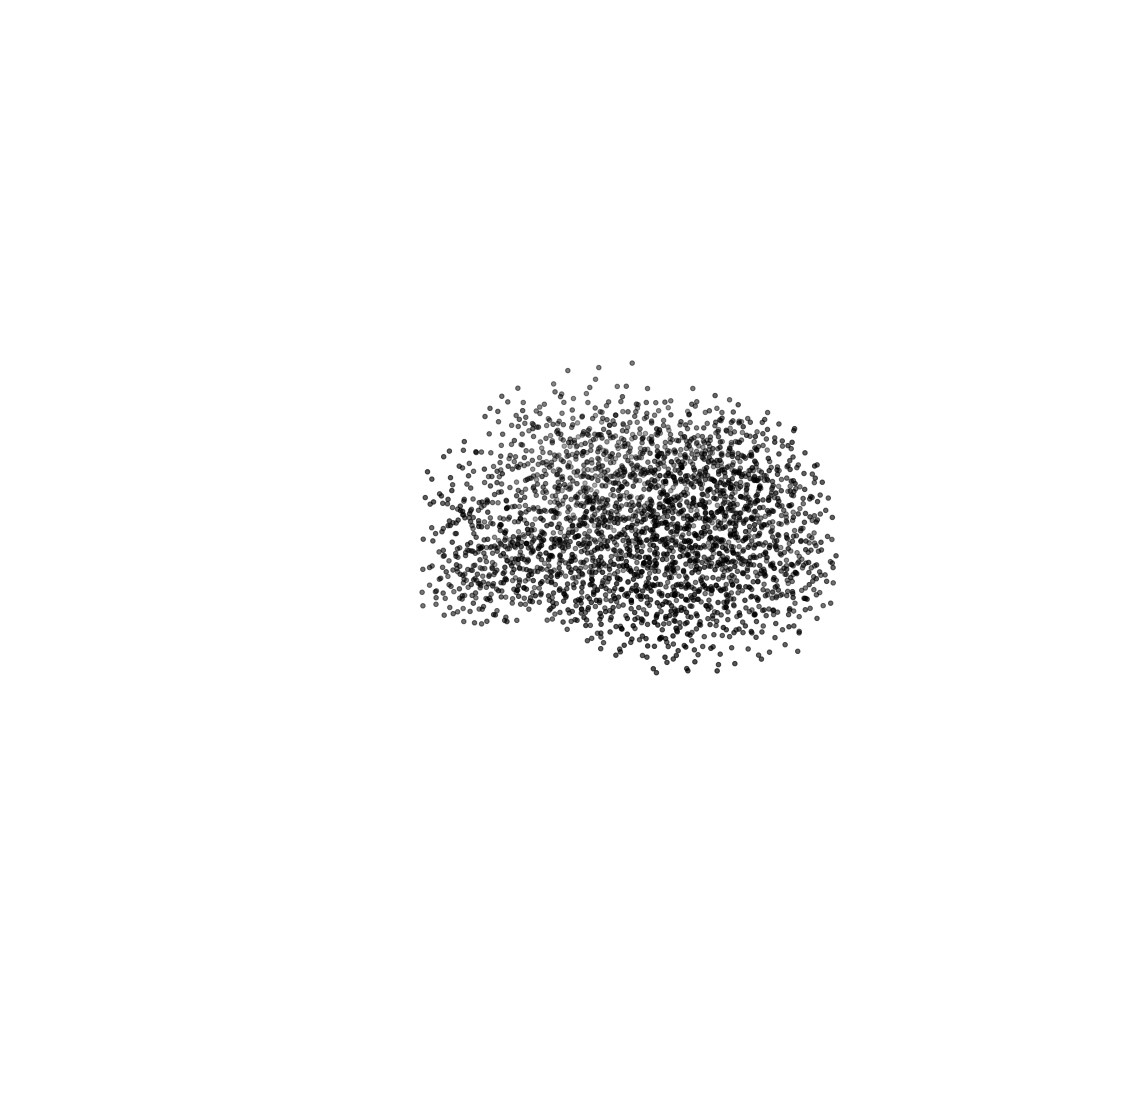

In [51]:
fig = plt.figure(figsize = (20, 20))

ax = fig.add_subplot(111, projection='3d')
ax.axes.set_xlim3d(left=1300, right=1600)
ax.axes.set_ylim3d(bottom=850, top=1150) 
ax.axes.set_zlim3d(bottom=3200, top=3450)
ax.scatter(xs = original[:,0], ys = original[:,1], zs = original[:,2], color='k',label = 'Original pcd', s = 20)
#ax.set_yticklabels([])
#ax.set_xticklabels([])
#ax.set_zticklabels([])
#ax.grid(False)
ax.set_axis_off()

#ax.set_title('3D Point Cloud', fontdict = {'fontsize':40})
#ax.legend(loc='upper left',  prop={'size': 25})

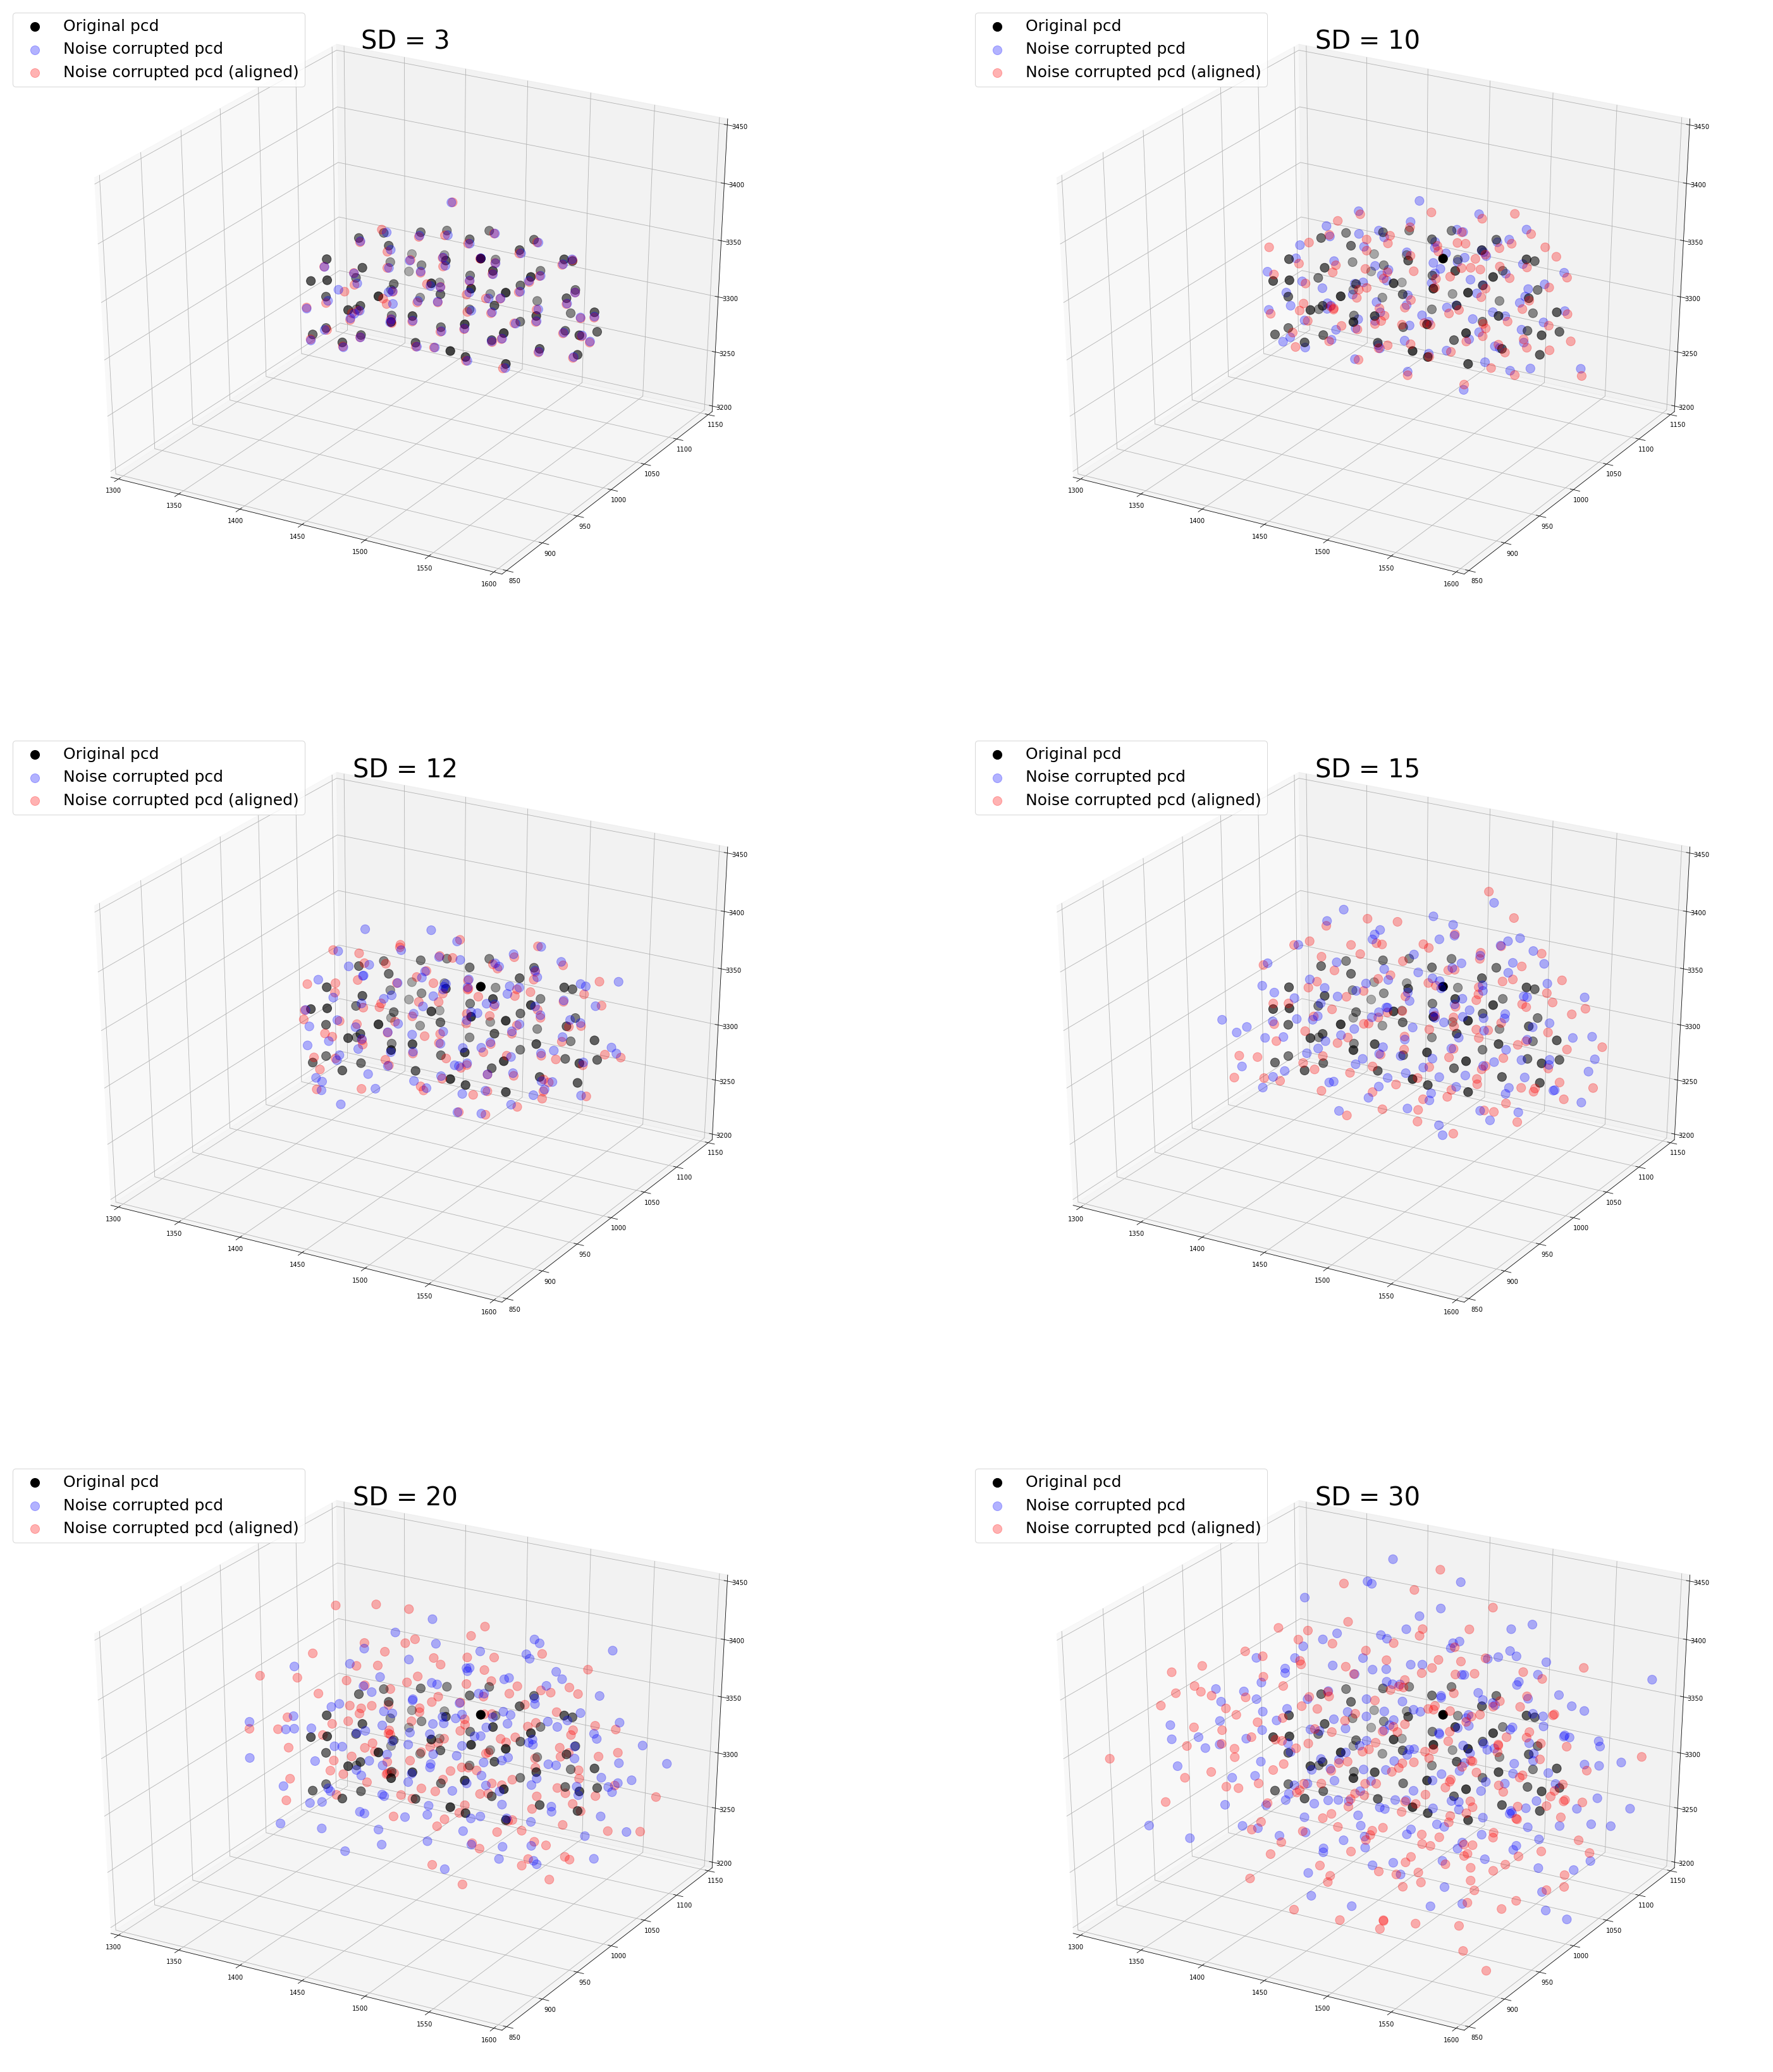

In [174]:
fig = plt.figure(figsize = (50, 60))

ax = fig.add_subplot(321, projection='3d')
ax.axes.set_xlim3d(left=1300, right=1600)
ax.axes.set_ylim3d(bottom=850, top=1150) 
ax.axes.set_zlim3d(bottom=3200, top=3450)
ax.scatter(xs = original[:,0], ys = original[:,1], zs = original[:,2], color='k',label = 'Original pcd', s = 200)
ax.scatter(xs = sd3[:,0], ys = sd3[:,1], zs = sd3[:,2], color='b',label = 'Noise corrupted pcd', s = 200, alpha = 0.3)
ax.scatter(xs = sd3_aligned[:,0], ys = sd3_aligned[:,1], zs = sd3_aligned[:,2], color='r',label = 'Noise corrupted pcd (aligned)', s = 200, alpha = 0.3)
ax.set_title('SD = 3', fontdict = {'fontsize':40})
ax.legend(loc='upper left',  prop={'size': 25})

ax = fig.add_subplot(322, projection='3d')
ax.axes.set_xlim3d(left=1300, right=1600) 
ax.axes.set_ylim3d(bottom=850, top=1150) 
ax.axes.set_zlim3d(bottom=3200, top=3450)
ax.scatter(xs = original[:,0], ys = original[:,1], zs = original[:,2], color='k',label = 'Original pcd', s = 200)
ax.scatter(xs = sd10[:,0], ys = sd10[:,1], zs = sd10[:,2], color='b',label = 'Noise corrupted pcd', s = 200, alpha = 0.3)
ax.scatter(xs = sd10_aligned[:,0], ys = sd10_aligned[:,1], zs = sd10_aligned[:,2], color='r',label = 'Noise corrupted pcd (aligned)', s = 200, alpha = 0.3)
ax.set_title('SD = 10', fontdict = {'fontsize':40})
ax.legend(loc='upper left',  prop={'size': 25})

ax = fig.add_subplot(323, projection='3d')
ax.axes.set_xlim3d(left=1300, right=1600) 
ax.axes.set_ylim3d(bottom=850, top=1150) 
ax.axes.set_zlim3d(bottom=3200, top=3450)
ax.scatter(xs = original[:,0], ys = original[:,1], zs = original[:,2], color='k',label = 'Original pcd', s = 200)
ax.scatter(xs = sd12[:,0], ys = sd12[:,1], zs = sd12[:,2], color='b',label = 'Noise corrupted pcd', s = 200, alpha = 0.3)
ax.scatter(xs = sd12_aligned[:,0], ys = sd12_aligned[:,1], zs = sd12_aligned[:,2], color='r',label = 'Noise corrupted pcd (aligned)', s = 200, alpha = 0.3)
ax.set_title('SD = 12', fontdict = {'fontsize':40})
ax.legend(loc='upper left',  prop={'size': 25})


ax = fig.add_subplot(324, projection='3d')
ax.axes.set_xlim3d(left=1300, right=1600) 
ax.axes.set_ylim3d(bottom=850, top=1150) 
ax.axes.set_zlim3d(bottom=3200, top=3450)
ax.scatter(xs = original[:,0], ys = original[:,1], zs = original[:,2], color='k',label = 'Original pcd', s = 200)
ax.scatter(xs = sd15[:,0], ys = sd15[:,1], zs = sd15[:,2], color='b',label = 'Noise corrupted pcd', s = 200, alpha = 0.3)
ax.scatter(xs = sd15_aligned[:,0], ys = sd15_aligned[:,1], zs = sd15_aligned[:,2], color='r',label = 'Noise corrupted pcd (aligned)', s = 200, alpha = 0.3)
ax.set_title('SD = 15', fontdict = {'fontsize':40})
ax.legend(loc='upper left',  prop={'size': 25})

ax = fig.add_subplot(325, projection='3d')
ax.axes.set_xlim3d(left=1300, right=1600) 
ax.axes.set_ylim3d(bottom=850, top=1150) 
ax.axes.set_zlim3d(bottom=3200, top=3450)
ax.scatter(xs = original[:,0], ys = original[:,1], zs = original[:,2], color='k',label = 'Original pcd', s = 200)
ax.scatter(xs = sd20[:,0], ys = sd20[:,1], zs = sd20[:,2], color='b',label = 'Noise corrupted pcd', s = 200, alpha = 0.3)
ax.scatter(xs = sd20_aligned[:,0], ys = sd20_aligned[:,1], zs = sd20_aligned[:,2], color='r',label = 'Noise corrupted pcd (aligned)', s = 200, alpha = 0.3)
ax.set_title('SD = 20', fontdict = {'fontsize':40})
ax.legend(loc='upper left',  prop={'size': 25})

ax = fig.add_subplot(326, projection='3d')
ax.axes.set_xlim3d(left=1300, right=1600) 
ax.axes.set_ylim3d(bottom=850, top=1150) 
ax.axes.set_zlim3d(bottom=3200, top=3450)
ax.scatter(xs = original[:,0], ys = original[:,1], zs = original[:,2], color='k',label = 'Original pcd', s = 200)
ax.scatter(xs = sd30[:,0], ys = sd30[:,1], zs = sd30[:,2], color='b',label = 'Noise corrupted pcd', s = 200, alpha = 0.3)
ax.scatter(xs = sd30_aligned[:,0], ys = sd30_aligned[:,1], zs = sd30_aligned[:,2], color='r',label = 'Noise corrupted pcd (aligned)', s = 200, alpha = 0.3)
ax.set_title('SD = 30', fontdict = {'fontsize':40})
ax.legend(loc='upper left',  prop={'size': 25})


# Calibration curve results:

## Fitness- Calibration Curve

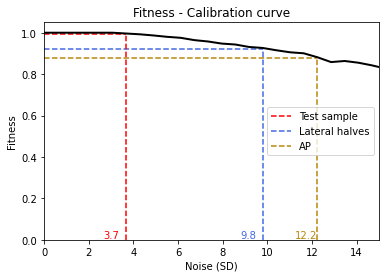

In [175]:
plt.plot(x,fitness, linewidth = 2, color = "black")
plt.title("Fitness - Calibration curve")
plt.xlabel("Noise (SD)")
plt.ylabel("Fitness")

noise_test = np.isclose(fitness, test_results.fitness, atol = 0.005)
noise_me_z= np.isclose(fitness, me_z.fitness, atol = 0.01)
noise_me_x = np.isclose(fitness, me_x.fitness, atol = 0.01)

plt.hlines(y=test_results.fitness, xmin=0, xmax=x[noise_test][0], linestyles = "dashed", color = "red")
plt.hlines(y=me_z.fitness, xmin=0, xmax=x[noise_me_z][0], linestyles = "dashed", color = "royalblue")
plt.hlines(y=me_x.fitness, xmin=0, xmax=x[noise_me_x][0], linestyles = "dashed", color = "darkgoldenrod")

plt.vlines(x=x[noise_test][0], ymin=0, ymax=test_results.fitness, linestyles = "dashed", color = "red")
plt.vlines(x=x[noise_me_z][0], ymin=0, ymax=me_z.fitness, linestyles = "dashed", color = "royalblue")
plt.vlines(x=x[noise_me_x][0], ymin=0, ymax=me_x.fitness, linestyles = "dashed", color = "darkgoldenrod")

plt.xlim([0,15])
plt.ylim([0,1.05])

line_red = mlines.Line2D([], [], color='red',label='Test sample', linestyle =  '--')
line_blue = mlines.Line2D([], [], color='royalblue',label='Lateral halves', linestyle =  '--')
line_gold = mlines.Line2D([], [], color='darkgoldenrod',label='AP', linestyle =  '--')

plt.annotate(xy=[x[noise_test][0]-1, 0.01], s=x[noise_test][0].round(1), color = "red")
plt.annotate(xy=[x[noise_me_z][0]-1, 0.01], s=x[noise_me_z][0].round(1), color = "royalblue")
plt.annotate(xy=[x[noise_me_x][0]-1, 0.01], s=x[noise_me_x][0].round(1), color = "darkgoldenrod")


plt.legend(handles=[line_red, line_blue, line_gold], loc = "center right") 

#plt.savefig('Fitness-Calibration_Curve.png')

## Inlier RMSE - Calibration Curve

[False False False False False False False False False False False  True
 False  True False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]


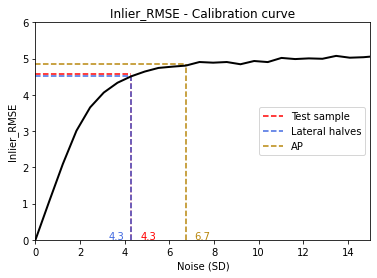

In [176]:
plt.plot(x,inlier_rmse, linewidth = 2, color = "black")
plt.title("Inlier_RMSE - Calibration curve")
plt.xlabel("Noise (SD)")
plt.ylabel("Inlier_RMSE")

noise_test = np.isclose(inlier_rmse, test_results.inlier_rmse, atol = 0.08)
noise_me_z= np.isclose(inlier_rmse, me_z.inlier_rmse, atol = 0.08)
noise_me_x = np.isclose(inlier_rmse, me_x.inlier_rmse, atol = 0.05)
print(noise_me_x)
plt.hlines(y=test_results.inlier_rmse, xmin=0, xmax=x[noise_test][0], linestyles = "dashed", color = "red")
plt.hlines(y=me_z.inlier_rmse, xmin=0, xmax=x[noise_me_z][0], linestyles = "dashed", color = "royalblue")
plt.hlines(y=me_x.inlier_rmse, xmin=0, xmax=x[noise_me_x][0], linestyles = "dashed", color = "darkgoldenrod")

plt.vlines(x=x[noise_test][0], ymin=0, ymax=test_results.inlier_rmse, linestyles = "dashed", color = "red")
plt.vlines(x=x[noise_me_z][0], ymin=0, ymax=me_z.inlier_rmse, linestyles = "dashed", color = "royalblue")
plt.vlines(x=x[noise_me_x][0], ymin=0, ymax=me_x.inlier_rmse, linestyles = "dashed", color = "darkgoldenrod")

plt.xlim([0,15])
plt.ylim([0,6])

line_red = mlines.Line2D([], [], color='red',label='Test sample', linestyle =  '--')
line_blue = mlines.Line2D([], [], color='royalblue',label='Lateral halves', linestyle =  '--')
line_gold = mlines.Line2D([], [], color='darkgoldenrod',label='AP', linestyle =  '--')

plt.annotate(xy=[x[noise_test][0]+0.4, 0.01], s=x[noise_test][0].round(1), color = "red")
plt.annotate(xy=[x[noise_me_z][0]-1, 0.01], s=x[noise_me_z][0].round(1), color = "royalblue")
plt.annotate(xy=[x[noise_me_x][0]+0.4, 0.01], s=x[noise_me_x][0].round(1), color = "darkgoldenrod")


plt.legend(handles=[line_red, line_blue, line_gold], loc = "center right") 

#plt.savefig('Fitness-Calibration_Curve.png')

## Scaled inlier RMSE - Calibration curve

[False False False False False False False False False False False False
 False False False False False False  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]


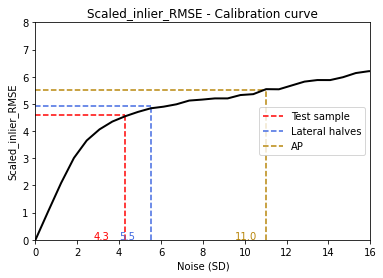

In [178]:
plt.plot(x,scaled_inlier_rmse, linewidth = 2, color = "black")
plt.title("Scaled_inlier_RMSE - Calibration curve")
plt.xlabel("Noise (SD)")
plt.ylabel("Scaled_inlier_RMSE")

noise_test = np.isclose(scaled_inlier_rmse, test_results.inlier_rmse/test_results.fitness, atol = 0.1)
noise_me_z= np.isclose(scaled_inlier_rmse, me_z.inlier_rmse/me_z.fitness, atol = 0.08)
noise_me_x = np.isclose(scaled_inlier_rmse, me_x.inlier_rmse/me_x.fitness, atol = 0.05)

print(noise_me_x)
plt.hlines(y= test_results.inlier_rmse/test_results.fitness, xmin=0, xmax=x[noise_test][0], linestyles = "dashed", color = "red")
plt.hlines(y= me_z.inlier_rmse/me_z.fitness, xmin=0, xmax=x[noise_me_z][0], linestyles = "dashed", color = "royalblue")
plt.hlines(y=me_x.inlier_rmse/me_x.fitness, xmin=0, xmax=x[noise_me_x][0], linestyles = "dashed", color = "darkgoldenrod")

plt.vlines(x=x[noise_test][0], ymin=0, ymax= test_results.inlier_rmse/test_results.fitness, linestyles = "dashed", color = "red")
plt.vlines(x=x[noise_me_z][0], ymin=0, ymax= me_z.inlier_rmse/me_z.fitness, linestyles = "dashed", color = "royalblue")
plt.vlines(x=x[noise_me_x][0], ymin=0, ymax=me_x.inlier_rmse/me_x.fitness, linestyles = "dashed", color = "darkgoldenrod")

plt.xlim([0,16])
plt.ylim([0,8])

line_red = mlines.Line2D([], [], color='red',label='Test sample', linestyle =  '--')
line_blue = mlines.Line2D([], [], color='royalblue',label='Lateral halves', linestyle =  '--')
line_gold = mlines.Line2D([], [], color='darkgoldenrod',label='AP', linestyle =  '--')

plt.annotate(xy=[x[noise_test][0]-1.5, 0.01], s=x[noise_test][0].round(1), color = "red")
plt.annotate(xy=[x[noise_me_z][0]-1.5, 0.01], s=x[noise_me_z][0].round(1), color = "royalblue")
plt.annotate(xy=[x[noise_me_x][0]-1.5, 0.01], s=x[noise_me_x][0].round(1), color = "darkgoldenrod")


plt.legend(handles=[line_red, line_blue, line_gold], loc = "center right") 

#plt.savefig('Fitness-Calibration_Curve.png')

## Inlier MAE - Calibration Curve

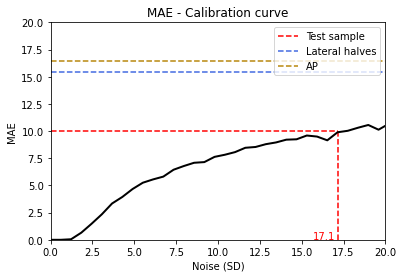

In [179]:
plt.plot(x,mae, linewidth = 2, color = "black")
plt.title("MAE - Calibration curve")
plt.xlabel("Noise (SD)")
plt.ylabel("MAE")

noise_test = np.isclose(mae, test_obj.mae, atol = 0.2)
#noise_me_z= np.isclose(y[2], me_z[2], atol = 1.8)
#noise_me_x = np.isclose(y[2], me_x[2], atol = 1.8)

plt.hlines(y=test_obj.mae, xmin=0, xmax=x[noise_test][0], linestyles = "dashed", color = "red")
plt.hlines(y=me_z_obj.mae, xmin=0, xmax=60, linestyles = "dashed", color = "royalblue")
plt.hlines(y=me_x_obj.mae, xmin=0, xmax=60, linestyles = "dashed", color = "darkgoldenrod")

plt.vlines(x=x[noise_test][0], ymin=0, ymax=test_obj.mae, linestyles = "dashed", color = "red")
#plt.vlines(x=x[noise_me_z][0], ymin=0, ymax=me_z[2], linestyles = "dashed", color = "royalblue")
#plt.vlines(x=x[noise_me_x][0], ymin=0, ymax=me_x[2], linestyles = "dashed", color = "darkgoldenrod")

plt.xlim([0,20])
plt.ylim([0,20])

line_red = mlines.Line2D([], [], color='red',label='Test sample', linestyle =  '--')
line_blue = mlines.Line2D([], [], color='royalblue',label='Lateral halves', linestyle =  '--')
line_gold = mlines.Line2D([], [], color='darkgoldenrod',label='AP', linestyle =  '--')

plt.annotate(xy=[x[noise_test][0]-1.5, 0.05], s=x[noise_test][0].round(1), color = "red")
#plt.annotate(xy=[0.2, 14.3], s=me_z_obj.mae.round(1), color = "royalblue")
#plt.annotate(xy=[0.2, 16.8], s=me_x_obj.mae.round(1), color = "darkgoldenrod")


plt.legend(handles=[line_red, line_blue, line_gold], loc = "best") 
#plt.savefig('MAE-Calibration_Curve.png')

## Scaled Inlier MAE - Calibration Curve

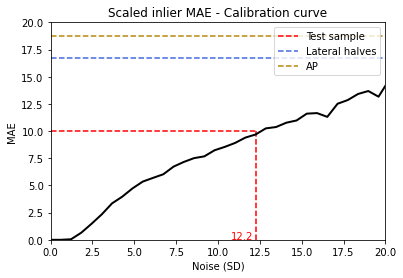

In [181]:
plt.plot(x,scaled_inlier_mae, linewidth = 2, color = "black")
plt.title("Scaled inlier MAE - Calibration curve")
plt.xlabel("Noise (SD)")
plt.ylabel("MAE")

noise_test = np.isclose(scaled_inlier_mae, test_obj.mae/test_results.fitness, atol = 0.4)
#noise_me_z= np.isclose(y[2], me_z[2], atol = 1.8)
#noise_me_x = np.isclose(y[2], me_x[2], atol = 1.8)

plt.hlines(y=test_obj.mae/test_results.fitness, xmin=0, xmax=x[noise_test][0], linestyles = "dashed", color = "red")
plt.hlines(y=me_z_obj.mae/me_z.fitness, xmin=0, xmax=60, linestyles = "dashed", color = "royalblue")
plt.hlines(y=me_x_obj.mae/me_x.fitness, xmin=0, xmax=60, linestyles = "dashed", color = "darkgoldenrod")

plt.vlines(x=x[noise_test][0], ymin=0, ymax=test_obj.mae/test_results.fitness, linestyles = "dashed", color = "red")
#plt.vlines(x=x[noise_me_z][0], ymin=0, ymax=me_z[2], linestyles = "dashed", color = "royalblue")
#plt.vlines(x=x[noise_me_x][0], ymin=0, ymax=me_x[2], linestyles = "dashed", color = "darkgoldenrod")

plt.xlim([0,20])
plt.ylim([0,20])

line_red = mlines.Line2D([], [], color='red',label='Test sample', linestyle =  '--')
line_blue = mlines.Line2D([], [], color='royalblue',label='Lateral halves', linestyle =  '--')
line_gold = mlines.Line2D([], [], color='darkgoldenrod',label='AP', linestyle =  '--')

plt.annotate(xy=[x[noise_test][0]-1.5, 0.05], s=x[noise_test][0].round(1), color = "red")
#plt.annotate(xy=[0.2, 14.3], s=me_z_obj.mae.round(1), color = "royalblue")
#plt.annotate(xy=[0.2, 16.8], s=me_x_obj.mae.round(1), color = "darkgoldenrod")


plt.legend(handles=[line_red, line_blue, line_gold], loc = "best") 
#plt.savefig('MAE-Calibration_Curve.png')

## Correspondence set size 

Text(0, 0.5, 'Correspondence set size')

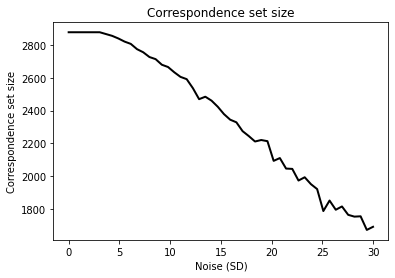

In [182]:
plt.plot(x,corr_num ,linewidth = 2, color = "black")
plt.title("Correspondence set size")
plt.xlabel("Noise (SD)")
plt.ylabel("Correspondence set size")

#plt.savefig('1c)corr_set_size-.png')


# Figure caption:

Noise calibration curves for the (a) Fitness (b) Scaled Inlier RMSE (c) Scaled Inlier MAE metrics. A calibration curve was constructed for each metric by registering a zero-mean, Gaussian noise-corrupted image to its original, uncorrupted copy and performing successive image registrations with noise of varying standard deviations (SD). For all three metrics, the calibration curves show that `Test sample` (red) registration performs better than the `Lateral halves`(blue) registration, which in turn performs better than the `AP`(gold) registration. (The inlier RMSE and MAE metrics were scaled by dividing each metric by the registration fitness to account for a decrease in the number of inlier points.)


# Result analysis

From our analysis, we observe that for the `fitness metric`, the `Test sample` registration result is comparable to registering an image to a 3.1 SD, noise-corrupted version of itself. 
